# Topic :: Text Mining

# Question :
     Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [ ]:
#Importing Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [29]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-10 07:09:30.128188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
#Loading Dataset

df=pd.read_csv('Elon_musk.csv',encoding='latin1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# EDA 

In [32]:
df.shape

(1999, 2)

In [33]:
df.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [34]:
df.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [35]:
df1 = df.copy()

In [36]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text Preprocessing

In [37]:
df=[Text.strip() for Text in df.Text]
df=[Text for Text in df if Text]
df[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [38]:
# Joining the list into one string 
text=' '.join(df)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [39]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

# Tokenization

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
text_tokens 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 

In [41]:
len(text_tokens)

21078

In [42]:
#Removing Stopwords with help of nltk
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewallet

In [43]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['freewalletorg', 'any', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'your', 'app', 'sucks', 'rt', 'spacex', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'httpstco3pwt', 'ajtourville', 'blkmdl3', 'rationaletienne', 'adamklotz', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'rationaletienne', 'adamklotz', 'starlink', 'staggeringly', 'difficult', 'technical', 'amp', 'economic', 'endeavor', 'however', 'httpstco9z8ac6skqx', 'rationaletienne', 'adamklotz', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'httpstco7j1c92hdjl', 'idaacarmack', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'httpstcoxmyi7qwsgw', 'adamklotz', 'it\x92s', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'amp', 'shipping', 'tobyliiiii

# Stemming

In [44]:
# Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['freewalletorg', 'ani', 'crypto', 'wallet', 'won\x92t', 'give', 'privat', 'key', 'avoid', 'cost', 'freewalletorg', 'your', 'app', 'suck', 'rt', 'spacex', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'httpstco3pwt', 'ajtourvil', 'blkmdl3', 'rationaletienn', 'adamklotz', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'rationaletienn', 'adamklotz', 'starlink', 'staggeringli', 'difficult', 'technic', 'amp', 'econom', 'endeavor', 'howev', 'httpstco9z8ac6skqx', 'rationaletienn', 'adamklotz', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'httpstco7j1c92hdjl', 'idaacarmack', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'httpstcoxmyi7qwsgw', 'adamklotz', 'it\x92', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'amp', 'ship', 'tobyliiiiiiiiii', 'thi', 'intend', 'earth', 'may', 'idea', 'ap

In [45]:
len(stemmed_tokens)

15518

# Lemmatization

In [46]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kunalb11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2oj frodo underdoge all thought would fail himself httpstcozgxjfdzzrm owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest httpstco3rwe9uhsts geoffkeighley unrealengine its getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power httpstcofc9uhqsd7o freewalletorg any crypto wallet wont give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together on

In [47]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', 'kanyewest', 'httpstco3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'it\x92s', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unl

In [48]:
clean_tweets=' '.join(lemmas)
clean_tweets

'kunalb11 i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2oj frodo underdoge all thought would fail himself httpstcozgxjfdzzrm owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyewest httpstco3rwe9uhsts geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power httpstcofc9uhqsd7o freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission httpstco

# Feature Extraction

1. Using CountVectorizer

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [53]:
print(vectorizer.vocabulary_)

{'kunalb11': 2690, 'alien': 229, 'idaacarmack': 2431, 'ray': 3595, 'trace': 4462, 'cyberpunk': 960, 'hdr': 1668, 'nextlevel': 3138, 'have': 1662, 'try': 4496, 'joerogan': 2611, 'spotify': 4088, 'great': 1601, 'interview': 2540, 'gtera27': 1619, 'doge': 1111, 'underestimate': 4625, 'teslacn': 4308, 'congratulation': 853, 'tesla': 4302, 'china': 738, 'amazing': 255, 'execution': 1322, 'last': 2707, 'year': 4894, 'now': 3177, 'next': 3137, 'even': 1293, 'happy': 1649, 'new': 3134, 'ox': 3295, 'httpstco9wfkmyu2oj': 1858, 'frodo': 1487, 'underdoge': 4624, 'all': 232, 'thought': 4387, 'would': 4870, 'fail': 1358, 'himself': 1714, 'httpstcozgxjfdzzrm': 2391, 'owensparks': 3292, 'flcnhvy': 1429, 'anonyx10': 284, 'haha': 1634, 'thanks': 4346, 'indeed': 2480, 'tweet': 4515, 'definitely': 1014, 'represent': 3677, 'realworld': 3620, 'time': 4404, 'allocation': 234, 'the': 4353, 'entertaining': 1250, 'outcome': 3271, 'likely': 2768, 'givedirectly': 1571, 'just': 2638, 'send': 3862, 'agree': 200, 'c

In [65]:
import warnings
warnings.filterwarnings('ignore')
print(vectorizer.get_feature_names_out()[100:200])
print(x.toarray())

['420' '4227' '430' '43rd' '445pm' '448' '4530000' '45thspacew' '4680'
 '479000' '48' '4d' '4th' '4thfromourstar' '50' '50000' '50k' '60' '60000'
 '65' '69420' '6f' '6k' '6pm' '727' '727pm' '74' '78' '7th' '90' '9007mm'
 '91demigod' '922' '948' '95' '99' '9inety6princ' 'aber' 'abl' 'abo'
 'aboard' 'abort' 'about' 'abov' 'absenc' 'absolut' 'absorb' 'absorpt'
 'absurd' 'absurdli' 'ac' 'academia' 'accel' 'acceler' 'accelera' 'accept'
 'access' 'accid' 'accident' 'accommod' 'account' 'accur' 'accura'
 'accuraci' 'ace' 'achi' 'achiev' 'acquisit' 'across' 'action' 'activ'
 'actual' 'actuari' 'ad' 'adagio' 'adamblitz' 'adamhoov' 'adamkiotz'
 'adamklotz' 'add' 'addit' 'address' 'adlanbogatyryov' 'administ'
 'adolfomoreno' 'adult' 'advanc' 'advantag' 'adventur' 'advertis' 'advic'
 'advis' 'aero' 'afb' 'affair' 'affect' 'afford' 'afloathickori' 'africa'
 'after']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
print(x.toarray().shape)

(15560, 4926)


# Feature Extraction

Using Stemming

In [56]:
x1 = vectorizer.fit_transform(stemmed_tokens)

In [57]:
x1

<15518x4763 sparse matrix of type '<class 'numpy.int64'>'
	with 15271 stored elements in Compressed Sparse Row format>

In [58]:
x1.toarray().shape

(15518, 4763)

In [59]:
print(vectorizer.vocabulary_)

{'kunalb11': 2620, 'alien': 233, 'idaacarmack': 2384, 'ray': 3471, 'trace': 4308, 'cyberpunk': 936, 'hdr': 1626, 'nextlevel': 3049, 'have': 1620, 'tri': 4326, 'joerogan': 2542, 'spotifi': 3945, 'great': 1557, 'interview': 2472, 'gtera27': 1576, 'doge': 1079, 'underestim': 4470, 'teslacn': 4159, 'congratul': 837, 'tesla': 4153, 'china': 725, 'amaz': 257, 'execut': 1278, 'last': 2638, 'year': 4732, 'now': 3088, 'next': 3048, 'even': 1254, 'happi': 1606, 'new': 3045, 'ox': 3192, 'httpstco9wfkmyu2oj': 1811, 'frodo': 1443, 'underdog': 4469, 'all': 235, 'thought': 4234, 'would': 4708, 'fail': 1313, 'himself': 1670, 'httpstcozgxjfdzzrm': 2344, 'owenspark': 3189, 'flcnhvi': 1382, 'anonyx10': 287, 'haha': 1592, 'thank': 4193, 'inde': 2429, 'tweet': 4360, 'definit': 989, 'repres': 3543, 'realworld': 3494, 'time': 4251, 'alloc': 236, 'the': 4200, 'entertain': 1213, 'outcom': 3169, 'like': 2695, 'givedirectli': 1523, 'just': 2569, 'sent': 3728, 'agre': 204, 'clubhous': 767, 'kanyewest': 2578, 'htt

# 2. Count Vectorizer with N-grams (Bigrams & Trigrams)

In [60]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [66]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['actually' 'ajtourville' 'also' 'amp' 'austinbarnard45' 'big' 'car'
 'cleantechnica' 'come' 'cool' 'could' 'day' 'dragon' 'earth' 'engine'
 'ercxspace' 'erdayastronaut' 'evafoxu' 'exactly' 'falcon' 'felixschlang'
 'first' 'flcnhvy' 'flight' 'get' 'go' 'good' 'great' 'haha' 'hard' 'high'
 'idaacarmack' 'it' 'kristennetten' 'land' 'launch' 'lexfridman' 'like'
 'lot' 'make' 'marcushousegame' 'maybe' 'mission' 'model' 'much' 'nasa'
 'nasaspaceflight' 'need' 'neuralink' 'new' 'next' 'no' 'not' 'one'
 'people' 'ppathole' 'pretty' 'probably' 'production' 'rationaletienne'
 're' 'right' 'rt' 'soon' 'space' 'spacestation' 'spacex' 'starship'
 'still' 'sure' 'take' 'tesla' 'teslaownerssv' 'teslarati' 'tesmaniancom'
 'test' 'that' 'the' 'there' 'thesheetztweetz' 'they' 'think' 'this'
 'time' 'tobyliiiiiiiiii' 'true' 'u0001f923u0001f923' 'use' 'way' 'we'
 'we re' 'week' 'well' 'wholemarsblog' 'will' 'work' 'would' 'yeah' 'year'
 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...

# 3.TF-IDF Vectorizer

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matix_ngram.toarray())

['10' '100' '13' '20' '28delayslater' '30' '60' 'able' 'absolutely'
 'accurate' 'actually' 'adamklotz' 'add' 'ago' 'agree' 'ai' 'air'
 'ajtourville' 'all' 'almost' 'already' 'also' 'although' 'amazing' 'amp'
 'and' 'appear' 'apply' 'appreciate' 'archillect' 'around' 'as'
 'astrobehnken' 'astrodoug' 'astrojordy' 'astronaut' 'austinbarnard45'
 'autopilot' 'awesome' 'back' 'bad' 'bar' 'base' 'battery' 'be'
 'benmezrich' 'berlin' 'berniesander' 'beta' 'big' 'bit' 'boca'
 'bocachicagal' 'body' 'booster' 'boringcompany' 'bs' 'build' 'but' 'buy'
 'call' 'camera' 'can' 'car' 'cargo' 'casparstanley' 'cbass3d' 'cell'
 'change' 'cleantechnica' 'close' 'cold' 'come' 'company' 'complete'
 'computer' 'confirm' 'congratulation' 'control' 'cool' 'cost' 'could'
 'course' 'create' 'crew' 'crew1' 'critical' 'curevac' 'cyberpunkgame'
 'cybertruck' 'datum' 'day' 'deep' 'definitely' 'delivery' 'design'
 'detail' 'didn' 'difference' 'different' 'djsnm' 'dmcryan' 'do' 'dock'
 'doesn' 'doge' 'dojo' 'don' 'drag

# Generate Word Cloud

In [68]:
# Define a function to plot word cloud 

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

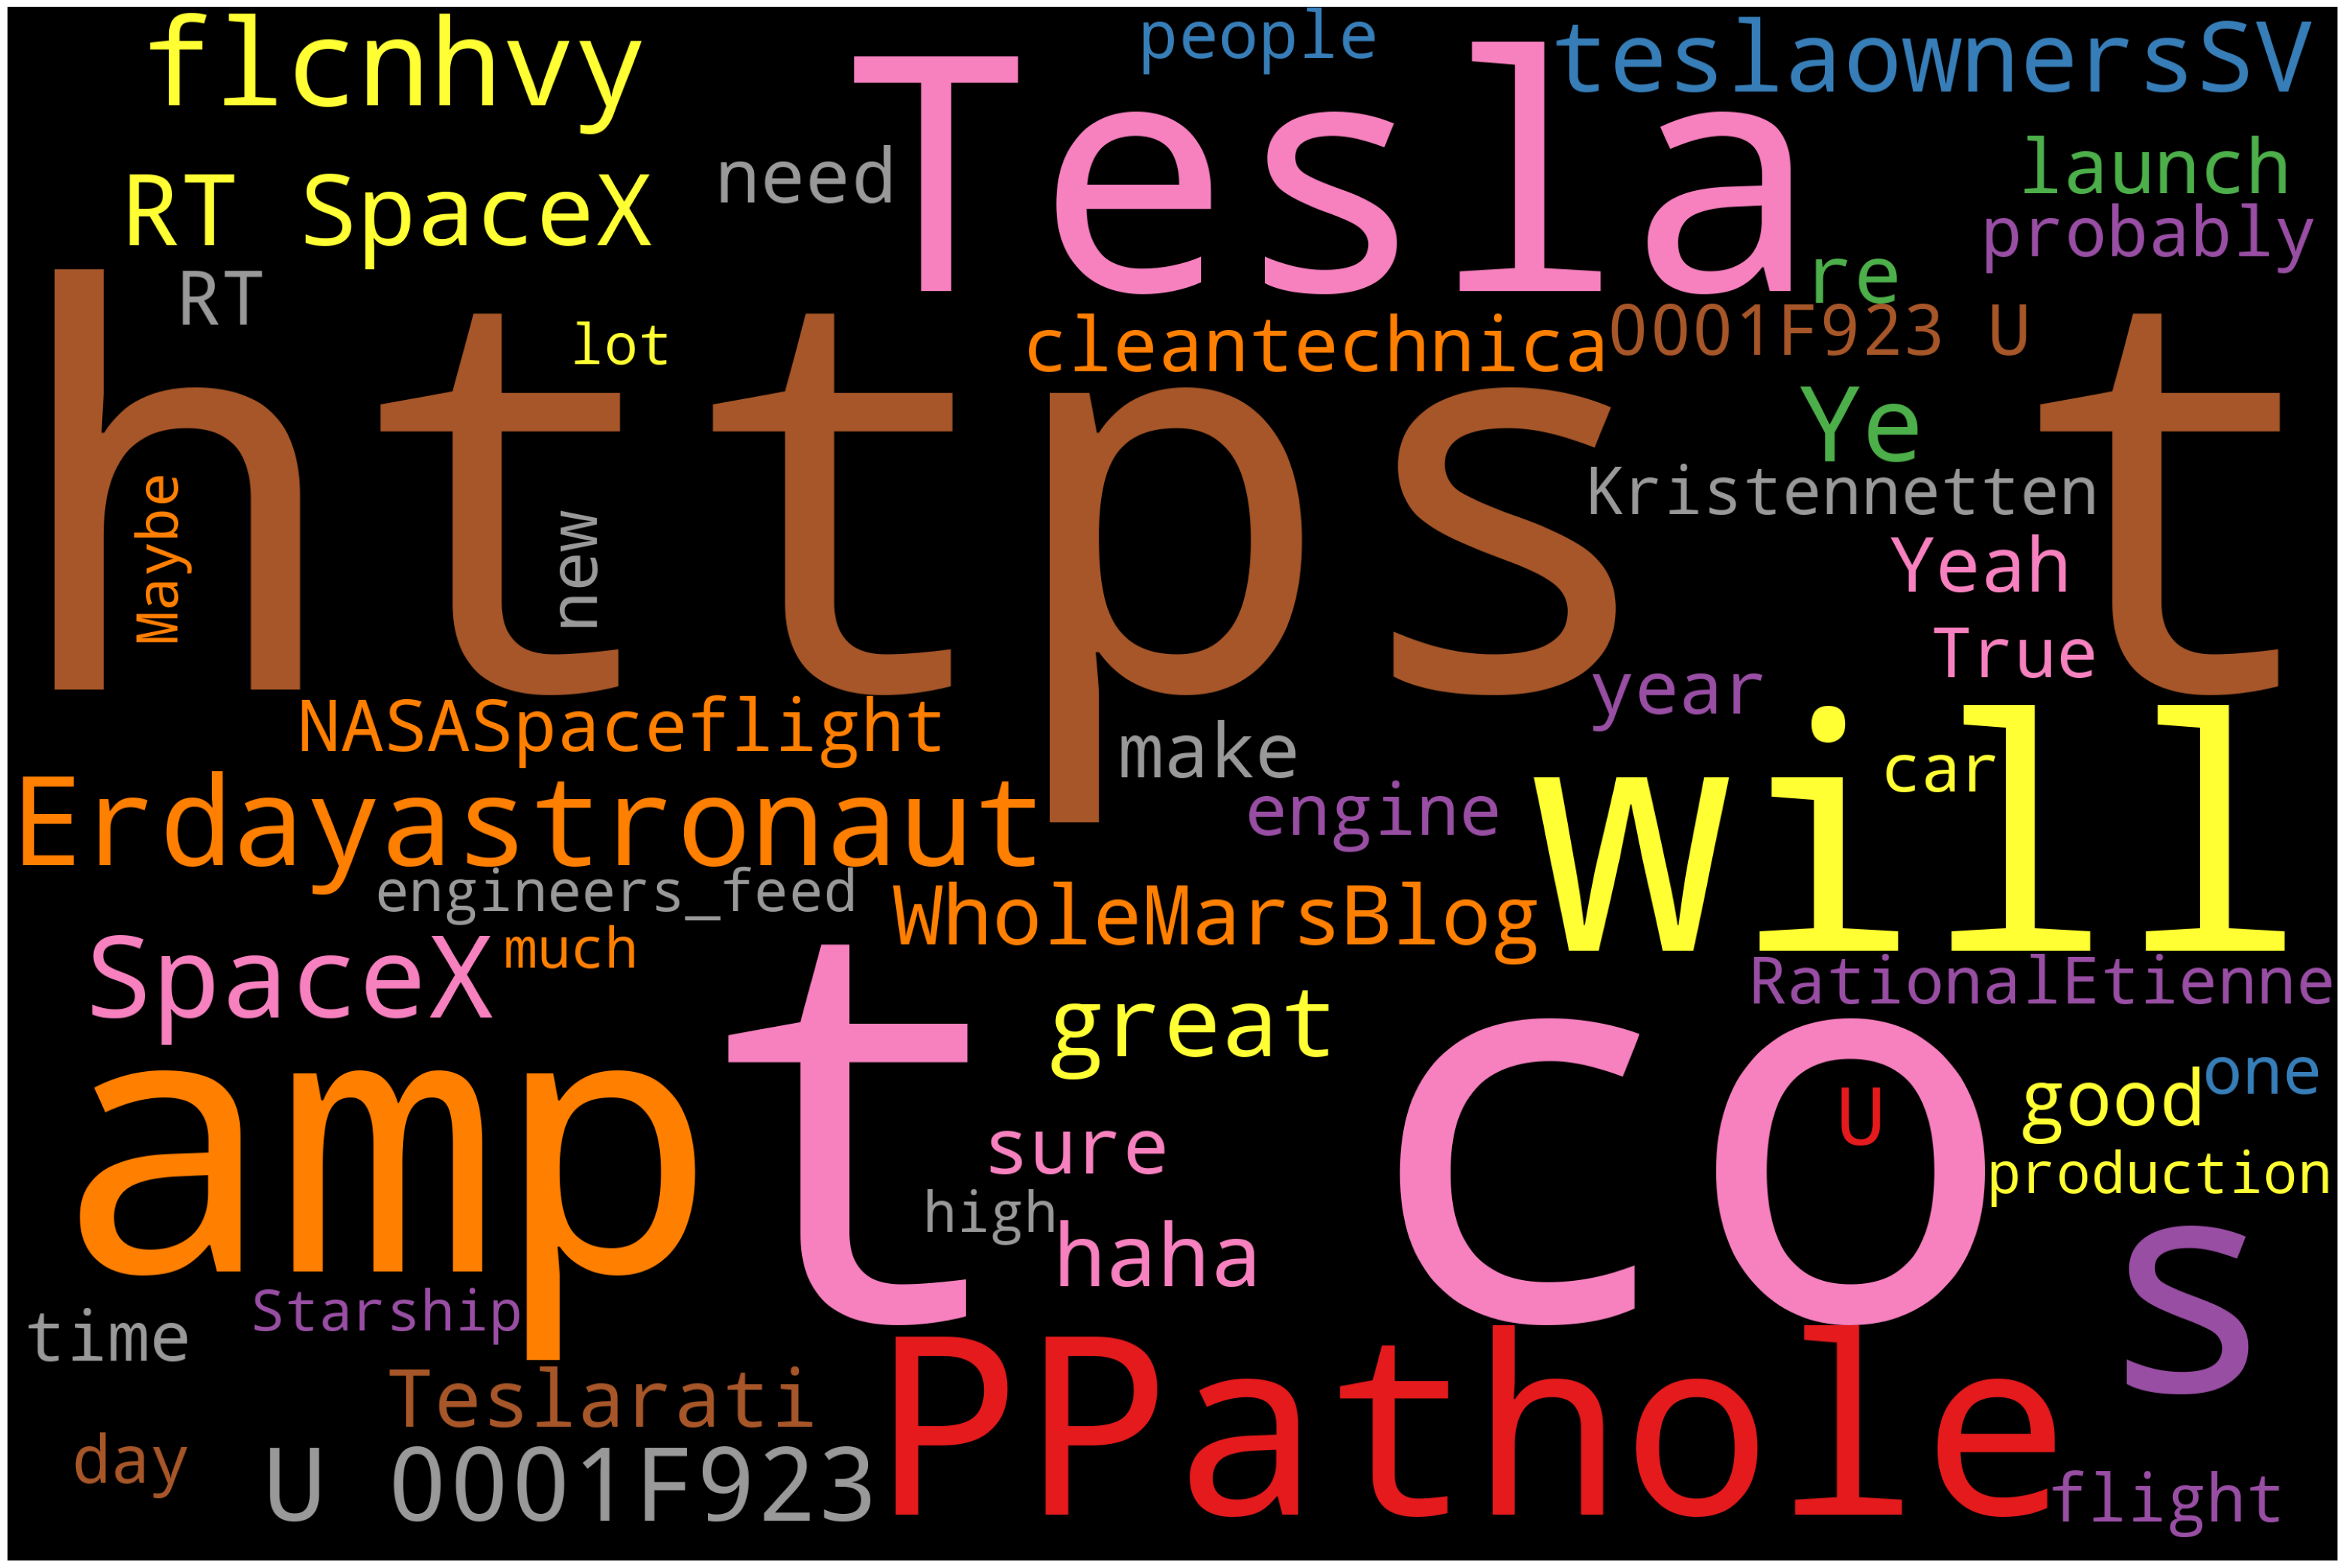

In [69]:
# Generate Word Cloud

from nltk.corpus import stopwords
wordcloud=WordCloud(width=3000, height=2000, background_color='black', max_words=50, colormap='Set1').generate(text)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [70]:
# Parts Of Speech  Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [71]:
one_block

'kunalb11 i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2oj frodo underdoge all thought would fail himself httpstcozgxjfdzzrm owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyewest httpstco3rwe9uhsts geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power httpstcofc9uhqsd7o freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission httpstco

In [72]:
for token in doc_block[100:200]:
    print(token,token.pos_)

freewalletorg NOUN
any DET
crypto ADJ
wallet NOUN
wont PROPN
give VERB
private ADJ
key ADJ
avoid NOUN
cost NOUN
freewalletorg NOUN
your PRON
app NOUN
suck VERB
rt PROPN
spacex VERB
nasa PROPN
select ADJ
falcon PROPN
heavy ADJ
launch NOUN
first ADJ
two NUM
element NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
httpstco3pwt PROPN
ajtourville PROPN
blkmdl3 PROPN
rationaletienne PROPN
adamklotz PROPN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo PROPN
rationaletienne PROPN
adamklotz PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
amp ADJ
economic ADJ
endeavor NOUN
however ADV
httpstco9z8ac6skqx DET
rationaletienne NOUN
adamklotz PROPN
spacex VERB
need VERB
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
httpstco7j1c92hdjl PROPN
idaacarmack VERB
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADP
httpstcoxmyi

In [73]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['seem', 'bit', 'itsallrisky', 'appear', 'fix', 'unit', 'time', 'michaelhodapp', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'work', 'tonight', 'ðogecoin', 'video', 'httpstcoueeocofctb', 'people', 'speak', 'lexfridman', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'come', 'simplicity', 'genius', 'astrogdogg', 'spacex', 'wapodavenport', 'decade', 'work', 'look', 'note', 'email', 'text', 'astrojordy', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'spacex', 'theonion', 'read', 'kingdom', 'hear', 'name', 'year', 'kristennetten', 'kristennetten', 'owenspark', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'spacex', 'say', 'ship', 'landing', 'burn', 'solution', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'spacex', 'spacex', 'seem', 'raptor', 'nasaspaceflight', 'spacex', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'spacex', 'launch', 'starlink', 'satell

In [74]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)
words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)
wf_df=pd.DataFrame(words_freq)
wf_df.columns=['word','count']
wf_df[0:10] # viewing top ten results

,word,count
0,spacex,197
1,tesla,100
2,erdayastronaut,73
3,make,64
4,launch,62
5,amp,52
6,year,48
7,need,48
8,work,48
9,go,42


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

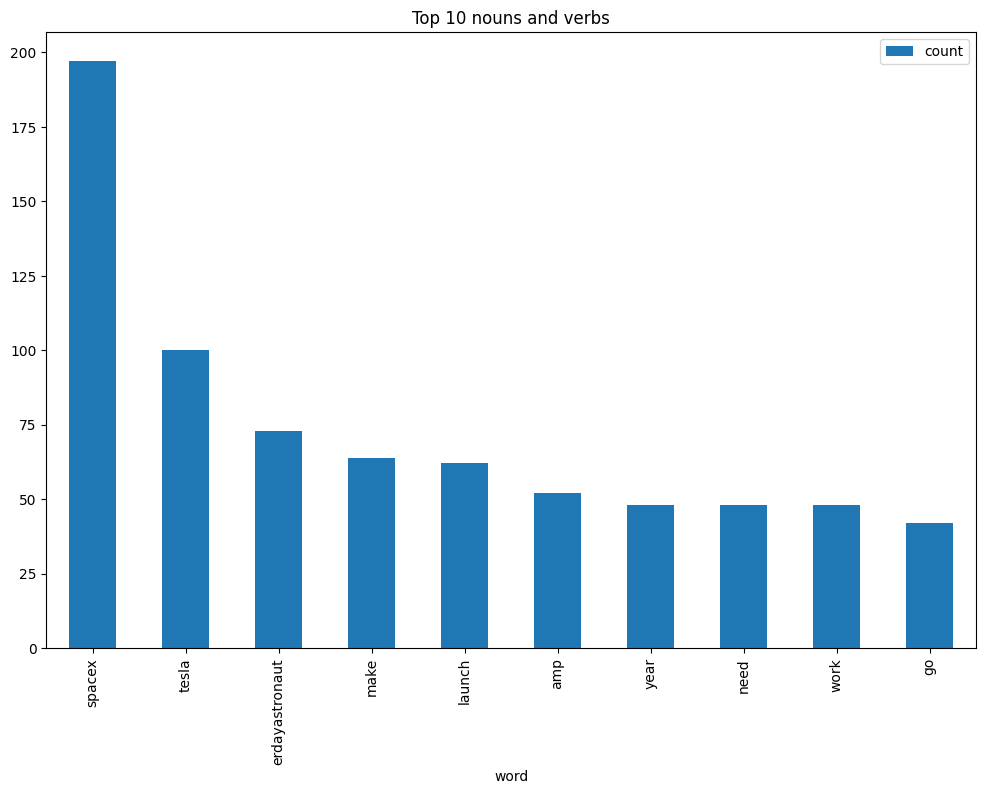

In [75]:
# Visualizing results 
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

# Emotion Mining - Sentiment Analysis

In [76]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(df))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [77]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [78]:
wf_df

,word,count
0,spacex,197
1,tesla,100
2,erdayastronaut,73
3,make,64
4,launch,62
...,...,...
2339,answer,1
2340,priority,1
2341,propaganda,1
2342,httpstcowjrzibkh1h,1


In [79]:
scores = wf_df.set_index('word')['count'].to_dict() 
scores

{'spacex': 197,
 'tesla': 100,
 'erdayastronaut': 73,
 'make': 64,
 'launch': 62,
 'amp': 52,
 'year': 48,
 'need': 48,
 'work': 48,
 'go': 42,
 'get': 39,
 'come': 38,
 'day': 38,
 'engine': 34,
 'time': 32,
 'use': 32,
 'test': 31,
 'people': 30,
 'kristennetten': 30,
 'car': 30,
 'flight': 30,
 'lot': 29,
 'starship': 29,
 'production': 29,
 're': 28,
 'wholemarsblog': 26,
 'model': 26,
 'we': 26,
 'land': 25,
 'mission': 22,
 'earth': 22,
 'take': 22,
 'dragon': 22,
 'idaacarmack': 21,
 'crew': 21,
 'thesheetztweetz': 21,
 'week': 21,
 'think': 21,
 'point': 20,
 'way': 20,
 'look': 19,
 'neuralink': 19,
 'rocket': 19,
 'try': 18,
 'seem': 18,
 'lexfridman': 18,
 'space': 18,
 'part': 18,
 'spacestation': 18,
 'marcushousegame': 18,
 'berniesander': 18,
 'rationaletienne': 17,
 'booster': 17,
 'say': 17,
 'teslaownerssv': 17,
 'month': 17,
 'thank': 16,
 'product': 16,
 'thing': 16,
 'start': 16,
 'fire': 16,
 'teslarati': 16,
 'feel': 15,
 'design': 15,
 'give': 14,
 'team': 14,
 

In [80]:
sentiment_lexicon = scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [81]:
#test that it works
calculate_sentiment(text = 'amazing')

1

In [82]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,11
1,Have you tried it?,25
2,@joerogan @Spotify Great interview!,6
3,@gtera27 Doge is underestimated @teslacn Congr...,50
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",13
923,"It may never pay out, as the stock cant b ht...",48
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,222


In [83]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [84]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
218,RT @boringcompany: Tunnel Rave https://t.co/d3...,473,129
105,@Erdayastronaut @SpaceX Was also thinking that...,481,94
776,RT @RealLifeStarman: We are going to go to th...,496,93
770,Latter also s https://t.co/dlMy5rybrK @NASASp...,529,129
543,When the crew arrives for RT @SpaceX: After la...,547,107
127,https://t.co/kaWWoL54jG @flabellina212 @Ration...,561,101
161,@harsimranbansal @heydave7 It will most likely...,601,93
588,The open areas https://t.co/rabjKrtQlw @Sav...,669,138
77,<U+0001F5A4> RT @SpaceX: Falcon 9 launches Sta...,761,109
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",1184,231


In [85]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count     927.000000
mean       81.661273
std       102.899192
min         0.000000
25%        12.500000
50%        48.000000
75%       111.500000
max      1184.000000
Name: sentiment_value, dtype: float64

In [86]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
21,Ð is for Ðogecoin!,0,4
34,@josh_bickett @ajtourville @Erdayastronaut @Sp...,0,5
44,@ohqwix @BnnJ6bCghvzQxLb <U+0001F923><U+0001F9...,0,6


In [87]:
sent_df[sent_df['sentiment_value']>=20].head() 

,sentence,sentiment_value,word_count
1,Have you tried it?,25,4
3,@gtera27 Doge is underestimated @teslacn Congr...,50,13
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,27,14
8,Tweets definitely do not represent real-world ...,47,8
9,The most entertaining outcome is the most like...,290,109


In [88]:
sent_df['index']=range(0,len(sent_df)) 

<Axes: xlabel='sentiment_value', ylabel='Density'>

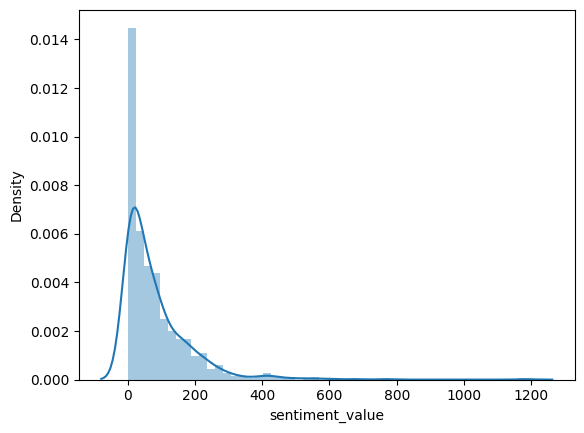

In [89]:
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

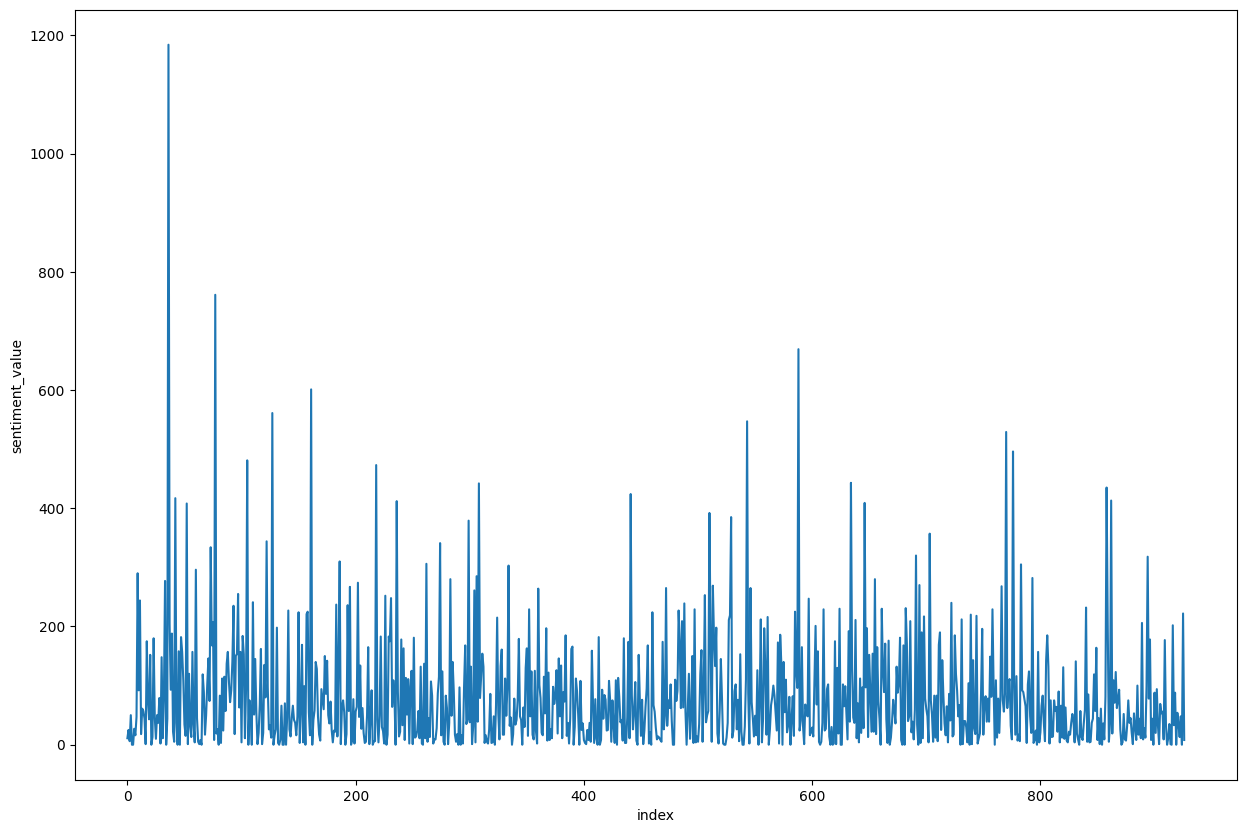

In [90]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

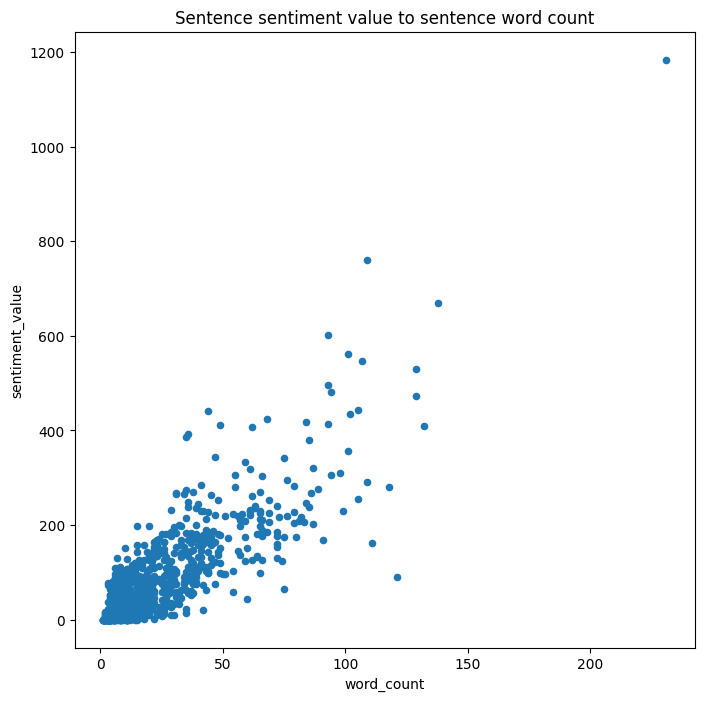

In [91]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')